# Convolutional Neural Networks

As the last topic of the neural network part of our course, we would like to have a look at convolutional neural networks (CNN). CNNs are very similar to ordinary Neural Networks — they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. CNNs are frequently employed for visual recognition. I.e. we use them in the Molecular Nanophotonics Group for the real-time detection of single particles.

In [89]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from scipy import ndimage
from scipy.signal import convolve
from skimage import data

plt.rcParams.update({'font.size': 18,
                     'axes.titlesize': 20,
                     'axes.labelsize': 20,
                     'axes.labelpad': 1,
                     'lines.linewidth': 2,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'
                    })

CNNs are biologically-inspired models inspired by research of [D. H. Hubel](https://de.wikipedia.org/wiki/David_H._Hubel) and [T. N. Wiesel](https://de.wikipedia.org/wiki/Torsten_N._Wiesel). They proposed an explanation for the way in which mammals visually perceive the world around them using a layered architecture of neurons in the brain, and this in turn inspired engineers to attempt to develop similar pattern recognition mechanisms in computer vision. 
In their hypothesis, within the visual cortex, complex functional responses generated by “complex cells” are constructed from more simplistic responses from “simple cells’. For instances, simple cells would respond to oriented edges etc, while complex cells will also respond to oriented edges but with a degree of spatial invariances. You may find the following [youtube video](https://www.youtube.com/watch?v=Cw5PKV9Rj3o) interesting with that respect.

## Layout of a CNN

![CNN](CNN_layout.png)

“A simple CNN is a sequence of layers, and every layer of a CNN transforms one volume of activations to another through a differentiable function.” What it actually means is that, each layer is associated with converting the information from the values, available in the previous layers, into some more complex information and pass on to the next layers for further generalization. 

1. **Convolution Block:**  Consists of the Convolution Layer and the Pooling Layer. This layer forms the essential component of Feature-Extraction
2. **Fully Connected Block** Consists of a fully connected simple neural network architecture. This layer performs the task of Classification based on the input from the convolutional block.


## Convolutional Layer

The convolutional layer is related to the extraction of specific features from an image for example. For this pupose it applies a filter with a specific mathematical procedure to the image. This filter is known from image processing to have a filter kernel. 

The image can be represented as a simple matrix with data entries. In general there might be three layers for the colors red green and blue but we will assume just a single layer here. In the same way, the kernel for the convolution is a simple image, just smaller. Often kernel sizes of 3x3 matrix entries are used. The image below shows two examples.

![image_kernel](image_kernel.png)

If the image is now convoluted with the kernel, a subimage of the same size as the kernel is selected from the image and multiplied elementwise with the kernel. The resulting matrix entries are then summed up to yield a single number, which corresponds to a single pixel in the corresponding convoluted image. The example above results in a 4x4 matrix, as there are just 4 different possible positions of the kernel along the 6x6 image. 

![convolution](convolution.png)

The above example shows, that the maximum value for the convolution result would be given if the original pixel numbers would be in a diagonal. The specific kernel, we have chosen is enhancing diagonal features in the image. Correspondingly other features would be enhanced by other kernels. Many CNNs apply in one step multiple kernels to the image. The results of these operation are called feature maps. The code below demonstrates the convolution with the `scipy` module.

**Image array**

In [104]:
a=np.array([[0,20,0,0,0,0],
            [0,20,0,10,10,10],
            [0,20,0,0,0,0],
            [0,20,0,0,5,0],
            [0,20,0,0,0,12],
            [0,20,0,0,0,6]])

**Convolution kernel**

In [105]:
k = np.array([[1,0,0],[0,1,0],[0,0,1]])

**Convolution**

In [127]:
r=convolve(a, k, mode='valid')

**Plotting**

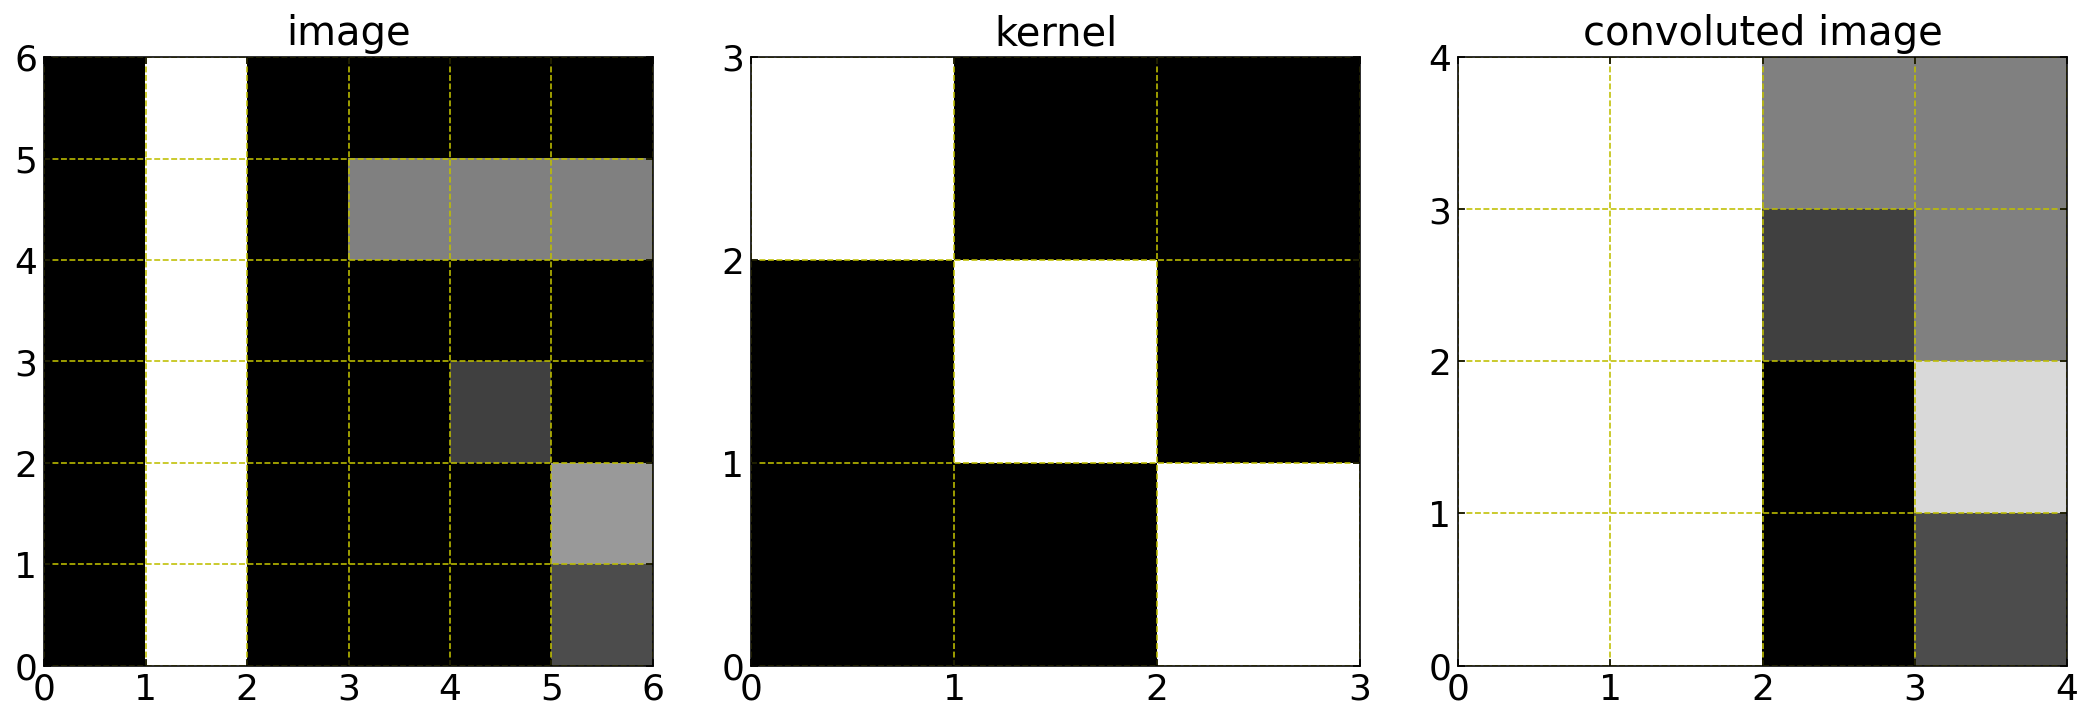

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(a,cmap='gray',extent=(0,6,0,6))
plt.xticks([0,1,2,3,4,5,6])
plt.yticks([0,1,2,3,4,5,6])
plt.grid(color='y',ls='--')
plt.title('image')

plt.subplot(1,3,2)
plt.imshow(k,cmap='gray',extent=(0,3,0,3))
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.grid(color='y',ls='--')
plt.title('kernel')

plt.subplot(1,3,3)
plt.imshow(r,cmap='gray',extent=(0,4,0,4))
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3,4])
plt.grid(color='y',ls='--')
plt.title('convoluted image')

plt.tight_layout()
plt.show()

### Padding

If we try to visualize the operation of convolution, in our head, as the filter matrix moves over the whole image, we find that the no of times, the values of the cells lying within the matrix is considered for the operation is more than the no. of times, the values of the cells in the corners or at the borders, are accounted for. This implies that the values at the corners or around the borders are not being given equal weightage. To overcome this, we add another row and column, of only 0, at all the sides of the image matrix. This idea is known as padding. In actual sense, these values being ‘0’ wouldn’t supply any extra information, but will help into accounting the previously less-accounted for values to be given more weightage. As a result of the padding, the output matrix is  now of the same size as the input matrix.

### Striding

In ‘strided’ convolution, instead of shifting the filter one-row or one-column at a time, we shift it, maybe, 2 or 3 rows or columns, each time. This is generally done to reduce the no of calculation and also reduce the size of the output matrix. For large image, this doesn’t results in loss of data, but reduces computation cost on a large scale.

## RELU Activation

The resulting feature maps are finally passed through and activation function as we identified before. 
ReLU or Rectified Linear Unit is applied on all the cells of all the output-matrix. The function is defined as:

$$
f(x)=\left\{
\begin{matrix}
0\,\, {\rm for\, x<0}\\
x\,\, {\rm for\, x\ge0}
\end{matrix}
\right .
$$

The shape of the ReLU function is shown below. It supresses essentially all output values which are negative. 

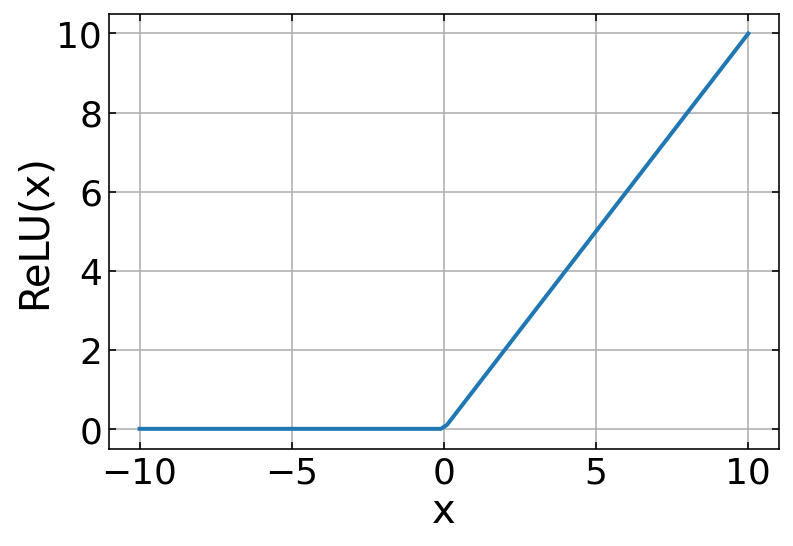

In [134]:
x=np.linspace(-10,10,100)
plt.plot(x,np.where(x>=0,x,0))
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid()
plt.show()

The basic intuition to derive from here is that, after convolution, if a particular convolution function results in ‘0’ or a negative value, it implies that the feature is not present there and we denote it by ‘0’, and for all the other cases we keep the value. 
Together with all the operations and the functions applied on the input image, we form the first part of the Convolutional Block.

##  Pooling Layer

The Pooling layer consist of performing the process of extracting a particular value from a set of values, usually the max value or the average value of all the values. This reduces the size of the output matrix. For example, for MAX-POOLING, we take in the max value among all the values of say a 2 X 2 part of the matrix. Thus, we are actually taking in the values denoting the presence of a feature in that section of the image. In this way we are getting rid of unwanted information regarding the presence of a feature in a particular portion of the image and considering only what is required to know. It is common to periodically insert a Pooling layer in-between successive convolutional blocks in a CNN architecture. Its function is to progressively reduce the spatial size of the representation to reduce the number of parameters and computation in the network.


![pooling](pooling.png)

## Output Size

All of the given operations are tentatively changing the input matrix size into an output matrix size.

$$
n_{\rm out}=\left [ \frac{n_{\rm in}+2p-k}{s}\right ]+1
$$

where

- $n_{\rm in}$: number of input features
- $n_{\rm out}$: number of output
- $k$: convolution kernel size
- $p$: padding size
- $s$: convolution stride size


For our above example $n_{\rm in}=6$, $k=3$, $p=0$ and $s=1$ from which $n_{\rm out}=4$ follows. 

## Flattening

After multiple convolution layers and downsampling operations, the 3D representation of the image is converted into a feature vector that is passed into a multi-layer perceptron to output probabilities. The following image describes the flattening operation

![flattening](flattening.png)

## Dropout

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

## Fully Connected Layer

This layer forms the last block of the CNN architecture, related to the task of classification. This is essentially a Fully connected Simple Neural Network as we constructed it in the lecture before. It is consisting of two or three hidden layers and an output layer generally implemented using ‘Softmax Regression’, that performs the work of classification among a large no of categories. The structure of the output layer therefore depends on what the output should be.

# Example CNN with Keras

We will use the knowledge gained above to create a convolutional neural network for the character recognition we started already in the last lecture with conventional neural networks. We refer to the same MNIST example as before. As the convolutional networks are more complex, we will use tensorflow and keras as the frontend to program that. Using this, the implementation is straight forward.

In [142]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

First we have to load the data and devide that into training and testing data. 

In [146]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the network

Our network shall consist of a 

- input layer with 28 x 28 pixels
- convolutional layer with 32 kernels of 3 x 3 pixels and a ReLU activation
- pooling layer taking the maximum of 2 x 2 pixels
- convolutional layer with 64 kernels of 3 x 3 pixels and a ReLU activation
- pooling layer taking the maximum of 2 x 2 pixels
- flattening layer
- dropout layer which choses randomly 50% of the input
- dense output layer with the number of classes, which is 10

This network is easily setup in kears by the following commands

In [144]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)               

## Train the network

Next we want to train the network. To do so, we first need to compile the model with a specific loss function, which is the `categorical_crossentropy` method, which we mentioned already last lecture. The compiled model can then be trained for a specific amount of epochs. It is important to have a part of the training data splitted apart to use that as the validation data. This validation data will also be used to calculated the loss but the loss is not minimized on that data but rather on the training data. What could happen during training is now that the training loss decreases but the validation loss increases. This in general means that the network is **overfitted** to the training data. It just reflects the training data but is not able to infer any other information accurately from it.

In [145]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 32s 75ms/step - loss: 0.3592 - accuracy: 0.8913 - val_loss: 0.0797 - val_accuracy: 0.9808
Epoch 2/15
422/422 [==============================] - 64s 152ms/step - loss: 0.1095 - accuracy: 0.9674 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 93s 220ms/step - loss: 0.0823 - accuracy: 0.9751 - val_loss: 0.0470 - val_accuracy: 0.9880
Epoch 4/15
422/422 [==============================] - 103s 245ms/step - loss: 0.0690 - accuracy: 0.9792 - val_loss: 0.0399 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 75s 177ms/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 68s 160ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0342 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 81s 193ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0342 - val_ac

## Evaluate the trained network

The following is just to tell you how accurate the model is. According to that, we achieve about 99% accuracy.

In [147]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024629030376672745
Test accuracy: 0.9918000102043152


## Evaluate the accuracy of your visual neural network ;-)

We can now randomly select a number from the tesing (not the training) data and display the prediction and compare that vs. your own built in neural network. 

My prediction is:  3


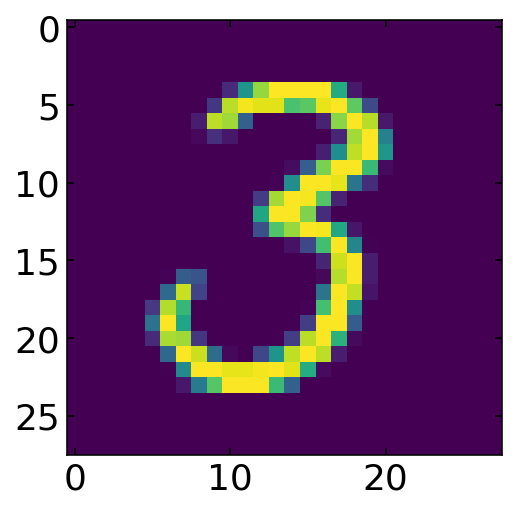

In [176]:
n=x_test[np.random.randint(0,1000)].reshape(1,28,28,1)
print('My prediction is: ',np.argmax(model.predict(n)))
plt.imshow(n.reshape(28,28))
plt.show()

## Where to go from here?

If you are interested in applying CNNs to classify and locate data, have a look at our [framework for single particle tracking](https://github.com/Molecular-Nanophotonics/YOLOv21-Framework) in real time. 
